In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import imutils
from PIL import Image
import keras
from keras import Sequential, losses, optimizers
from keras.layers import Dense, Conv2D, MaxPool2D, Average, Flatten, Dropout, Activation
from keras.utils import to_categorical, plot_model,vis_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard, EarlyStopping
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from skimage import io
import imutils
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
class DataModel:
    """
            DataModel
            not used currently in the program.
    """
    def __init__(self):
        self.items_labels = None
        self.images = []
        self.curated_data = {}
    def add_image(self, image_array):
        self.images.append(image_array)
    def add_labels(self, df):
        self.item_labels = df
    def add_curated_data(self, image, emotion):
        self.curated_data['image'] = image
        self.curated_data['emotion'] = emotion



# Loads the data and returns the image and emotions in a list format
def load_data(number_of_items=20):
    """
        number_of_items -> Number of items to return
        returns the data in a dictionary of images and labels.
    """
    path = "gdrive/My Drive/IMFDB_final"
    data = [] 
    curated_data = {"images":[], "emotions":[]}
    for actor_name in os.listdir(path)[:number_of_items]:
        # At the start of the iteration build a data model
        data_model = DataModel()
        if actor_name == ".DS_Store":
            continue
        print ("Going through actor:" + actor_name)
        for movie_folder_name in os.listdir(path+"/"+actor_name):
            print ("Goining through movie: ", movie_folder_name)
            if movie_folder_name == ".DS_Store":
                continue
            for items in os.listdir(path+"/"+actor_name+"/"+movie_folder_name):
                if items == ".DS_Store":
                    continue
                if items.endswith(".txt"):
                    print (items)
                    try:
                        print ("added")
                        df = pd.read_table(path+"/"+actor_name+"/"+movie_folder_name+"/"+items,header=None, engine="c")
                        data_model.add_labels(df) 
                        for image in os.listdir(path+"/"+actor_name+"/"+movie_folder_name+"/"+"images"):
                            #print (image)
                            if image == ".DS_Store":
                                continue
                            print ("going through image: ", image)
                            for d in df.values:
                                if d[2] == image:  
                                    
                                    im = cv2.imread(path+"/"+actor_name+"/"+movie_folder_name+"/"+"images"+"/"+image)
                                    im = cv2.resize(im, (80,80)) # Changing into 80x80X3
                                    #print(im.shape)
                                    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                                    
                                    
                                    data_model.add_curated_data(im, d[11])
                                    curated_data['images'].append(im)
                                    curated_data['emotions'].append(d[11])  # d[11] is where the emotion is there
                    except:
                        df = None                    
            data.append(data_model) # Save all the data

    return curated_data


result_predict=[]
result_actual=[]

result_predict=[]
result_actual=[]

# Test an image
def test_image(image_url):
    print(image_url.shape)
    #img = cv2.resize(image_url, (2,2))
    #plt.imshow(img)
    #print(img.shape)
    prediction = np.argmax(model.predict(image_url.reshape(1,2,2,512)))
    result_predict.append(get_emotion_from_class(prediction))
    print ( "The image is: ", get_emotion_from_class(prediction))

# Get emotion from class number   
def get_emotion_from_class(class_number):
    """
        gets the corresponding emotion from the class
    """
    if mapping.get(class_number,None):
      return mapping.get(class_number)
    else:
      return -1 # No such class



In [3]:
data = load_data(number_of_items=40)

Going through actor:AamairKhan
Goining through movie:  AndazApnaApna
AndazApnaApna.txt
added
going through image:  AamirKhan_69.jpg
going through image:  AamirKhan_55.jpg
going through image:  AamirKhan_237.jpg
going through image:  AamirKhan_41.jpg
going through image:  AamirKhan_96.jpg
going through image:  AamirKhan_182.jpg
going through image:  AamirKhan_82.jpg
going through image:  AamirKhan_155.jpg
going through image:  AamirKhan_141.jpg
going through image:  AamirKhan_196.jpg
going through image:  AamirKhan_169.jpg
going through image:  AamirKhan_168.jpg
going through image:  AamirKhan_140.jpg
going through image:  AamirKhan_154.jpg
going through image:  AamirKhan_183.jpg
going through image:  AamirKhan_236.jpg
going through image:  AamirKhan_222.jpg
going through image:  AamirKhan_197.jpg
going through image:  AamirKhan_83.jpg
going through image:  AamirKhan_97.jpg
going through image:  AamirKhan_40.jpg
going through image:  AamirKhan_56.jpg
going through image:  AamirKhan_54.j

In [4]:
print(len(data['images']))
encoder = LabelEncoder()
encoder.fit(data['emotions'])

11676


LabelEncoder()

In [0]:
# Label Encoding all the emotion data
data['emotions'] = encoder.transform(data['emotions'])

In [0]:
all_the_classes = encoder.classes_
mapping = {0: 'ANGER',
 1: 'ANGER NONE',
 2: 'DISGUST',
 3: 'FEAR',
 4: 'HAPPINESS',
 5: 'NEUTRAL',
 6: 'SADNESS',
 7: 'SURPRISE'}

# Get emotion from class number   
def get_emotion_from_class(class_number):
    """
        gets the corresponding emotion from the class
    """
    if mapping.get(class_number,None):
        return mapping.get(class_number)
    else:
        return -1 # No such class

In [0]:
# Extracting features and labels
features = np.array(data['images'])
labels = data['emotions']


In [8]:
print ("Shape of features: ", features.shape)
print ("Shape of labels: ", labels.shape)

Shape of features:  (11676, 80, 80)
Shape of labels:  (11676,)


In [0]:
labels = to_categorical(labels, num_classes=len(mapping))

In [10]:
model = Sequential()
model.add(Conv2D(8, kernel_size=5, input_shape=(80,80,1), activation="relu"))
model.add(Conv2D(8, kernel_size=5, activation="relu"))
model.add(MaxPool2D(2))
model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=5, activation="relu"))
model.add(Conv2D(16, kernel_size=5, activation="relu"))
model.add(MaxPool2D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(50, activation="relu"))
model.add(Dense(len(mapping), activation="softmax"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 76, 76, 8)         208       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 8)         1608      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        3216      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        6416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)       

In [12]:
model.compile(optimizer=optimizers.adam(lr=0.001), loss=keras.losses.categorical_crossentropy, metrics=['acc'])

In [13]:
# Splitting
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, shuffle=True, random_state=34)
print(labels_train.shape)
print(features_train.shape)

(8757, 8)
(8757, 80, 80)


In [0]:
tensorboard = TensorBoard()
earlystopping = EarlyStopping(patience=3)

In [0]:
features_train = features_train.astype("float32")
features_test = features_test.astype("float32")

In [16]:
features_train = features_train / 1/255
features_test = features_test / 1/255

print(features_train.shape)
print(features_test.shape)

(8757, 80, 80)
(2919, 80, 80)


In [17]:
features_train = features_train.reshape(len(features_train), 80, 80, 1)
features_test = features_test.reshape(len(features_test), 80, 80, 1)
print(features_train.shape)
print(features_test.shape)
labels_train1=[]
#print(labels_train)
#print("---------------------------")
#for i in labels_train:
 #   labels_train1.append(i.reshape(-1))
#labels_train1=np.asarray(labels_train1,dtype=np.float32)
#print(type(labels_train1))
#print(labels_train1.shape)

(8757, 80, 80, 1)
(2919, 80, 80, 1)


In [21]:
# Training
history = model.fit(features_train, labels_train, epochs=100, batch_size=32, callbacks=[tensorboard,earlystopping], validation_data=(features_test, labels_test))

Train on 8757 samples, validate on 2919 samples
Epoch 1/100
8757/8757 [==============================] - 106s 12ms/step - loss: 1.3330 - acc: 0.5076 - val_loss: 1.5364 - val_acc: 0.4375
Epoch 2/100
8757/8757 [==============================] - 105s 12ms/step - loss: 1.3189 - acc: 0.5173 - val_loss: 1.5324 - val_acc: 0.4354
Epoch 3/100
8757/8757 [==============================] - 106s 12ms/step - loss: 1.3066 - acc: 0.5164 - val_loss: 1.5483 - val_acc: 0.4313
Epoch 4/100
8757/8757 [==============================] - 106s 12ms/step - loss: 1.2929 - acc: 0.5279 - val_loss: 1.5436 - val_acc: 0.4385
Epoch 5/100
8757/8757 [==============================] - 107s 12ms/step - loss: 1.2765 - acc: 0.5299 - val_loss: 1.5530 - val_acc: 0.4337


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


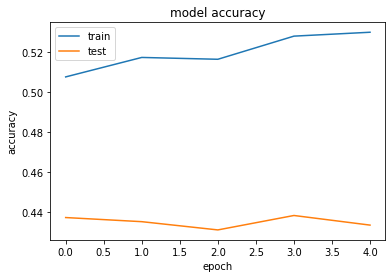

In [22]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# New Section